In [227]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
import missingno as msno

In [2]:
conda install -c conda-forge/label/gcc7 missingno

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.7.3

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.3



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [228]:
cols = ['Status of existing checking account', 'Duration in month', 'Credit history', 'Purpose (incomplete)', 
        'Credit amount', 'Savings account/bonds', 'Present employment since (incomplete)', 'Instalment rate in % of disposable income',
       'Personal status and sex', 'Other debtors / guarantors', 'Present residence since', 'Property', 'Age', 'Other installment plans', 
       'Housing', 'Number of existing credits at this bank', 'Job (incomplete)', 'Number of people being liable to provide maintenance for',
       'Telephone', 'Foreign worker (incomplete)', 'Creditworthy']

In [229]:
#Here we read the file
data = pd.read_csv('kredit.dat', sep='\t', header=None, names=cols, na_values="?" )

In [230]:
data

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,21,A32,A49,1572,A64,A75,4,A92,A101,...,A121,36,A141,A152,1,NaN,1,A191,NaN,1
996,A11,6,A31,A46,1198,A61,A75,4,A92,A101,...,A124,35,A143,A153,1,A173,1,A191,A201,2
997,A12,12,A32,A40,685,A61,A74,2,A94,A101,...,A123,25,A141,A152,1,NaN,1,A191,A201,2
998,A11,24,A32,A40,1381,A65,NaN,4,A92,A101,...,A122,35,A143,A152,1,A173,1,A191,A201,2


In [231]:
data.dtypes

Status of existing checking account                         object
Duration in month                                            int64
Credit history                                              object
Purpose (incomplete)                                        object
Credit amount                                                int64
Savings account/bonds                                       object
Present employment since (incomplete)                       object
Instalment rate in % of disposable income                    int64
Personal status and sex                                     object
Other debtors / guarantors                                  object
Present residence since                                      int64
Property                                                    object
Age                                                          int64
Other installment plans                                     object
Housing                                                     ob

In [232]:
data.isna().sum()

Status of existing checking account                           0
Duration in month                                             0
Credit history                                                0
Purpose (incomplete)                                        173
Credit amount                                                 0
Savings account/bonds                                         0
Present employment since (incomplete)                       496
Instalment rate in % of disposable income                     0
Personal status and sex                                       0
Other debtors / guarantors                                    0
Present residence since                                       0
Property                                                      0
Age                                                           0
Other installment plans                                       0
Housing                                                       0
Number of existing credits at this bank 

In [233]:
data[['Creditworthy']]

,Creditworthy
0,1
1,1
2,2
3,1
4,1
...,...
995,1
996,2
997,2
998,2


In [234]:
data.nunique()


Status of existing checking account                           4
Duration in month                                            33
Credit history                                                5
Purpose (incomplete)                                         10
Credit amount                                               921
Savings account/bonds                                         5
Present employment since (incomplete)                         5
Instalment rate in % of disposable income                     4
Personal status and sex                                       4
Other debtors / guarantors                                    3
Present residence since                                       4
Property                                                      4
Age                                                          53
Other installment plans                                       3
Housing                                                       3
Number of existing credits at this bank 

In [235]:
data.describe(include='all')

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
count,1000,1000.000000,1000,827,1000.000000,1000,504,1000.000000,1000,1000,...,1000,1000.000000,1000,1000,1000.000000,768,1000.000000,1000,640,1000.000000
unique,4,NaN,5,10,NaN,5,5,NaN,4,3,...,4,NaN,3,3,NaN,4,NaN,2,2,NaN
top,A14,NaN,A32,A43,NaN,A61,A73,NaN,A93,A101,...,A123,NaN,A143,A152,NaN,A173,NaN,A191,A201,NaN
freq,394,NaN,530,226,NaN,603,157,NaN,548,907,...,332,NaN,814,713,NaN,484,NaN,596,613,NaN
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,NaN,NaN,...,NaN,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN,1.300000
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,NaN,NaN,...,NaN,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN,0.458487
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,NaN,NaN,...,NaN,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,NaN,NaN,...,NaN,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,NaN,NaN,...,NaN,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN,1.000000
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,NaN,NaN,...,NaN,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN,2.000000


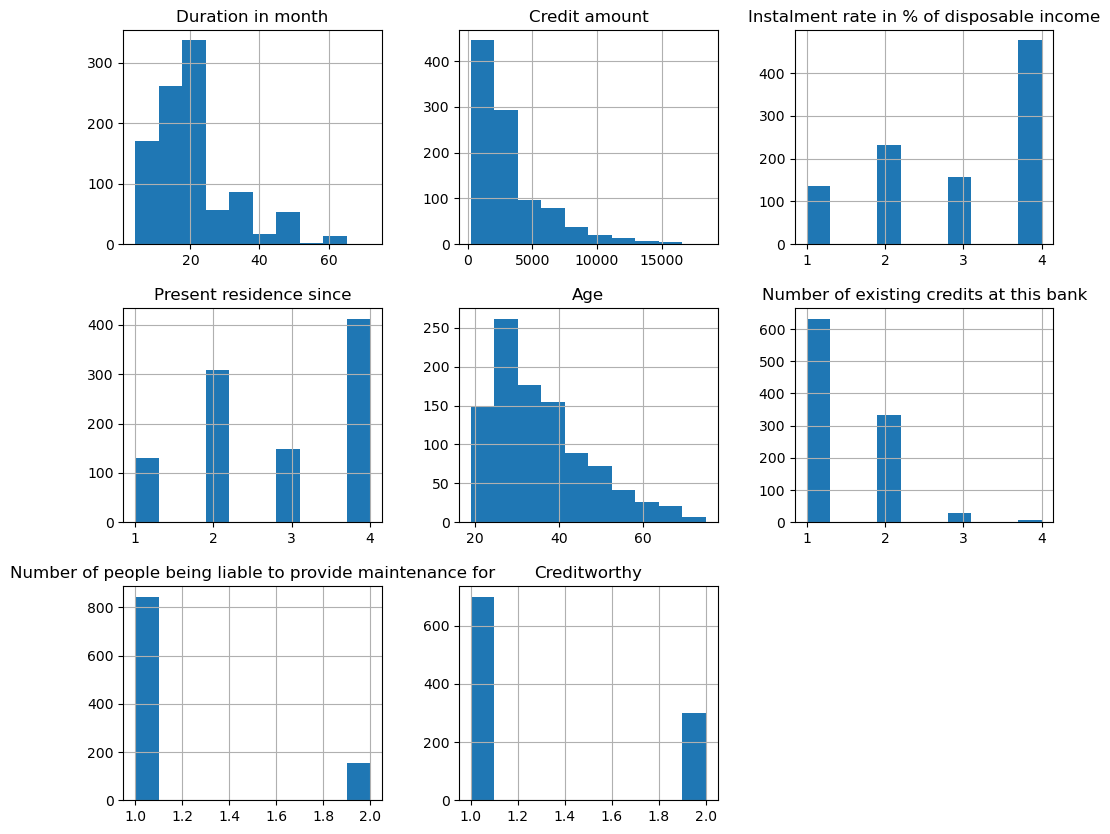

In [236]:
# Plotting histogram
data.hist(figsize = (12,10))
plt.show()
     


array([[<Axes: title={'center': 'Duration in month'}>,
        <Axes: title={'center': 'Credit amount'}>],
       [<Axes: title={'center': 'Present residence since'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Number of existing credits at this bank'}>,
        <Axes: title={'center': 'Number of people being liable to provide maintenance for'}>]],
      dtype=object)

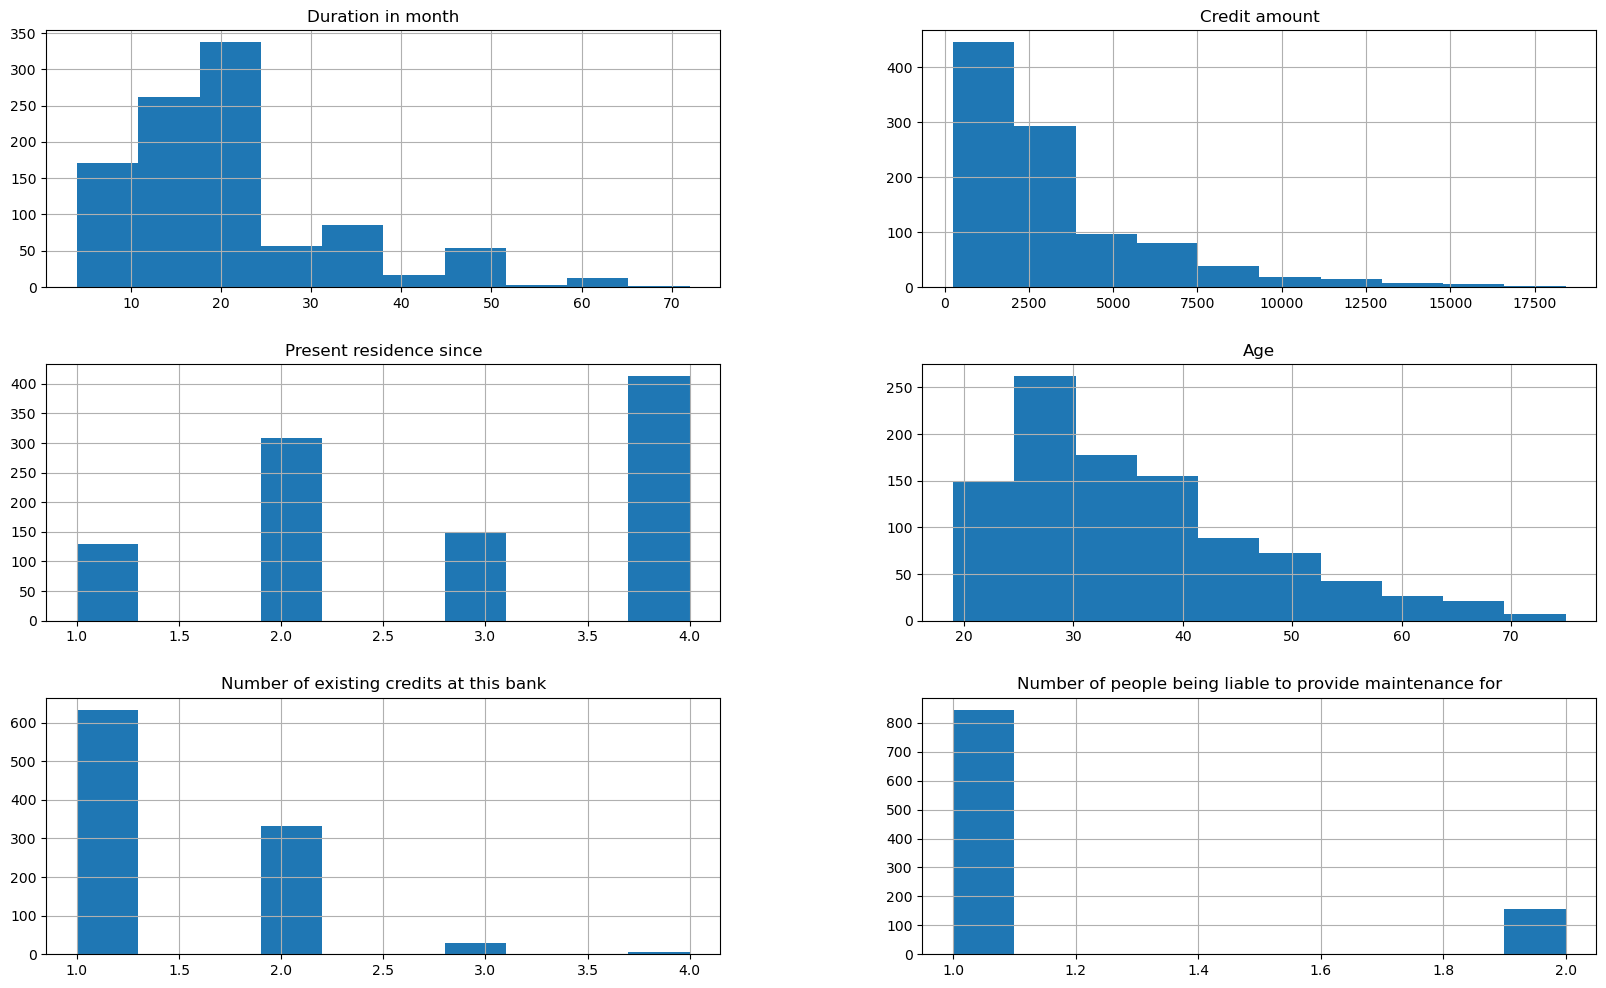

In [237]:
rcParams['figure.figsize'] = 20, 12
data[['Duration in month', 'Credit amount', 'Savings account/bonds', 'Present residence since', 'Age', 'Number of existing credits at this bank','Number of people being liable to provide maintenance for']].hist()

/var/folders/43/g9d6n4_j32g16y7_hfskv7r00000gp/T/ipykernel_4569/2713028968.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method='spearman')


<Axes: >

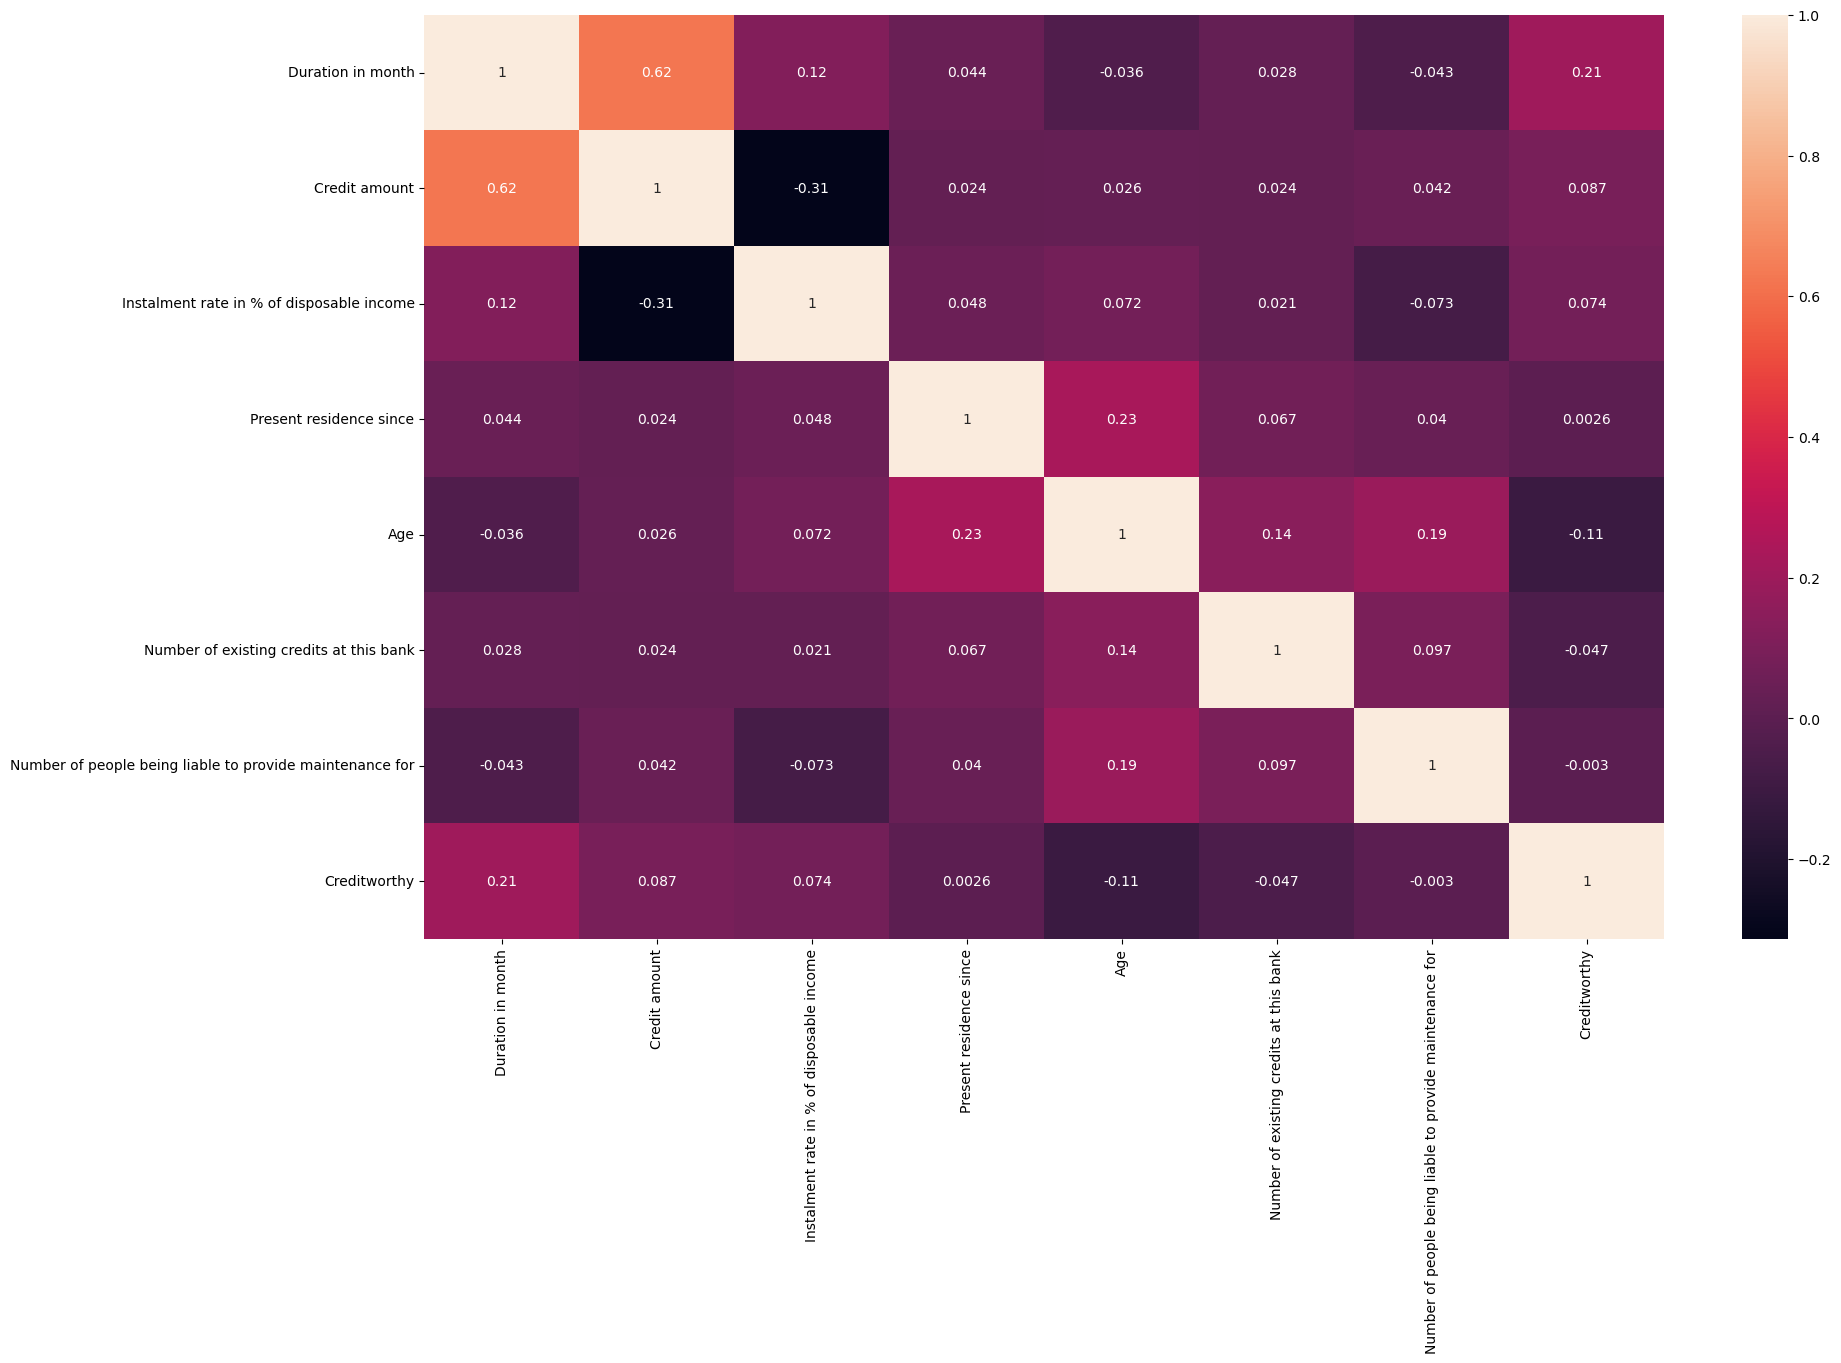

In [238]:
# Correlation and heatmap of numerical columns.
corr_matrix = data.corr(method='spearman')
sns.heatmap(corr_matrix, annot =True)

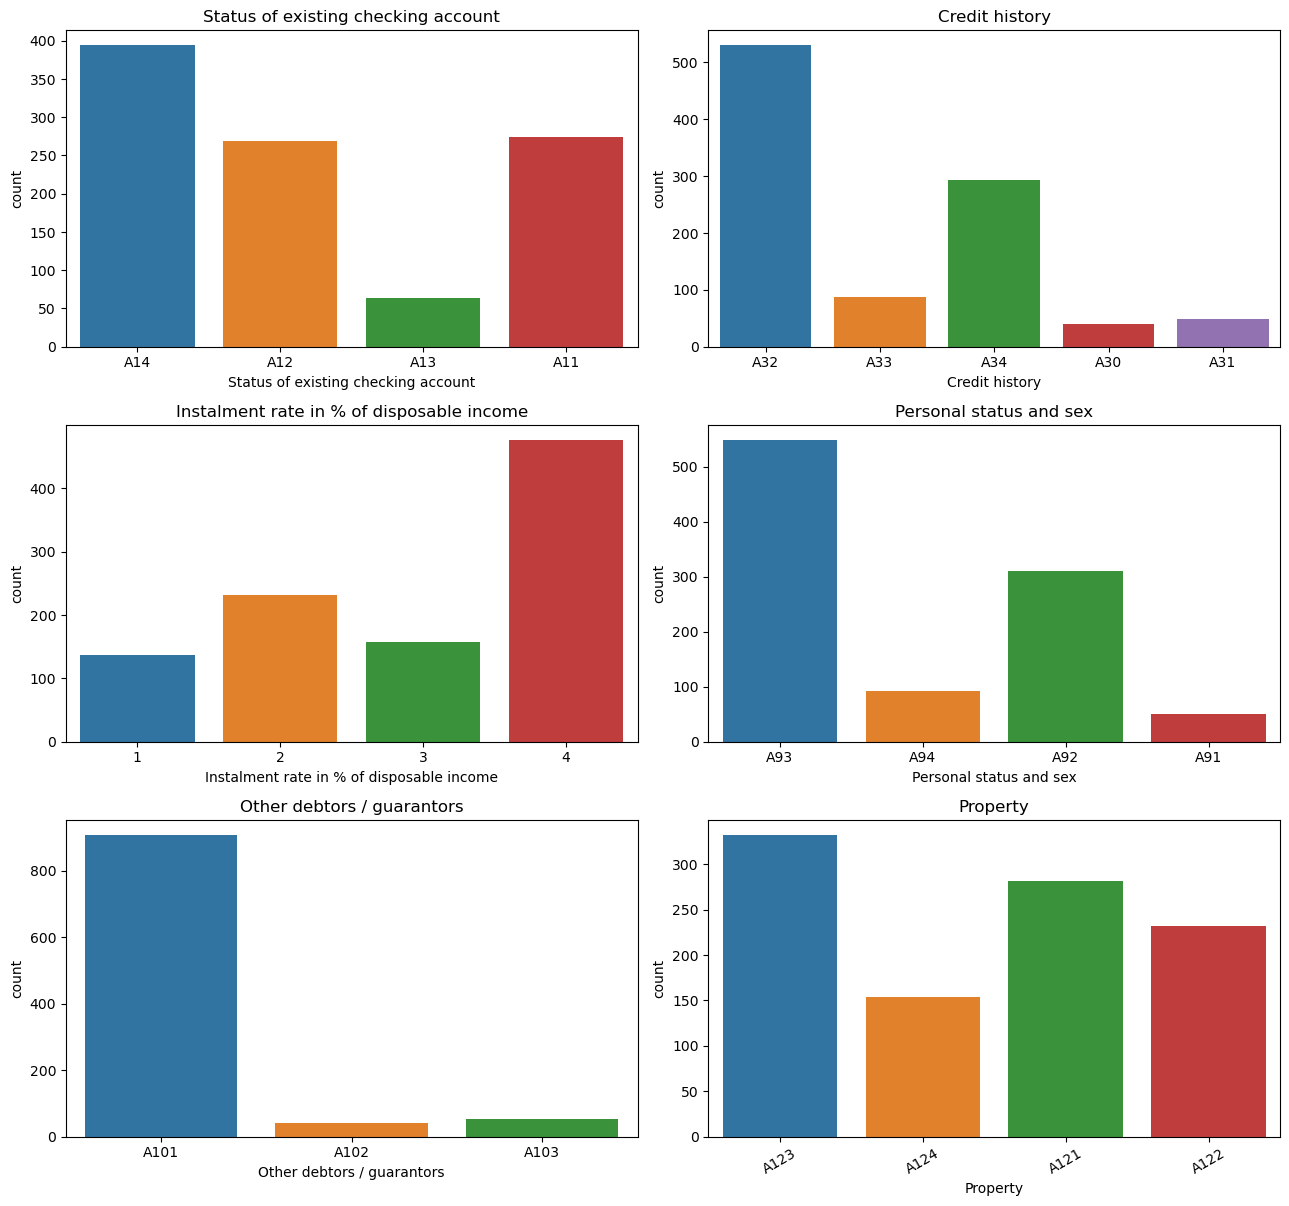

In [239]:
# Create the subplots
fig, axes = plt.subplots(3, 2, figsize = (13,12))

# Set subplot titles
titles = ['Status of existing checking account', 'Credit history', 'Instalment rate in % of disposable income', 'Personal status and sex', 'Other debtors / guarantors', 'Property','Other installment plans', 'Housing','Telephone']

# Create count plots for each subplot
for ax, title in zip(axes.flatten(), titles):
    sns.countplot(x=data[title], ax=ax)
    ax.set_title(title)

# Adjust spacing between subplots
plt.tight_layout()
plt.xticks(rotation=30)

# Show the figure
plt.show()

IndexError: index 2 is out of bounds for axis 0 with size 2

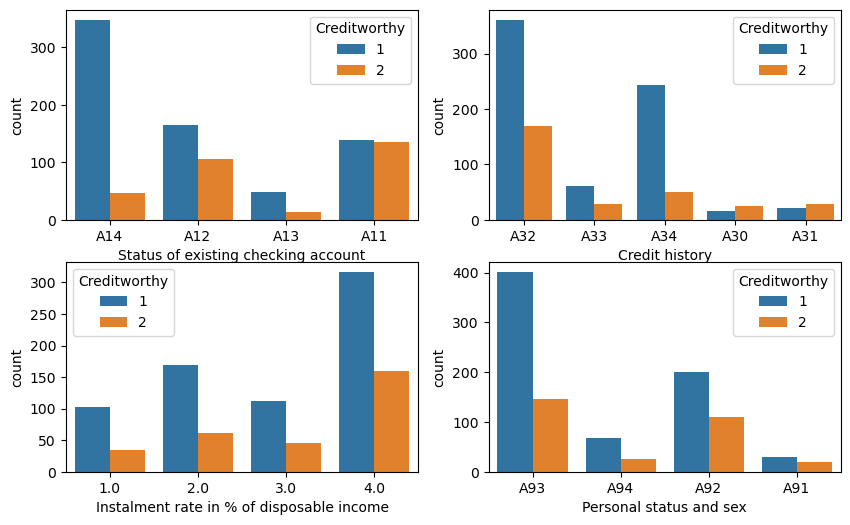

In [286]:
# Countplots for all the categorical variables by gender.
fig, axes = plt.subplots(2, 2, figsize = (10,6))

sns.countplot(data, x = 'Status of existing checking account', hue = 'Creditworthy', ax= axes[0,0])
sns.countplot(data, x = 'Credit history', hue = 'Creditworthy', ax= axes[0,1])
sns.countplot(data, x = 'Instalment rate in % of disposable income', hue = 'Creditworthy', ax= axes[1,0])
sns.countplot(data, x = 'Personal status and sex', hue = 'Creditworthy', ax= axes[1,1])
sns.countplot(data, x = 'Other debtors / guarantors', hue = 'Creditworthy', ax= axes[2,0])
sns.countplot(data, x = 'Property', hue = 'Creditworthy', ax= axes[2,1])
sns.countplot(data, x = 'Other installment plans', hue = 'Creditworthy', ax= axes[3,0])
sns.countplot(data, x = 'Personal status and sex', hue = 'Creditworthy', ax= axes[3,1])


plt.tight_layout()
plt.show()

In [ ]:
# Again checking for null values column wise
data.isnull().sum()

In [ ]:
# Checking most frequent Saving accounts
data['Purpose (incomplete)'].mode()
     

In [ ]:

# Checking most frequent Checking account
data['Present employment since (incomplete)'].mode()


In [ ]:
# Checking most frequent Checking account
data['Job (incomplete)'].mode()


In [ ]:
# Checking most frequent Checking account
data['Foreign worker (incomplete)'].mode()

In [ ]:
# Visualization of null values through matrix
msno.matrix(data)

# CATEGORICAL DATA ENCODING

In [241]:
data.head()

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
0,A14,36,A32,NaN,2299,A63,NaN,4,A93,A101,...,A123,39,A143,A152,1,A173,1,A191,NaN,1
1,A12,18,A32,A46,1239,A65,A73,4,A93,A101,...,A124,61,A143,A153,1,NaN,1,A191,A201,1
2,A13,24,A32,A40,947,A61,A74,4,A93,A101,...,A124,38,A141,A153,1,NaN,2,A191,NaN,2
3,A14,15,A33,A43,1478,A61,A73,4,A94,A101,...,A121,33,A141,A152,2,A173,1,A191,A201,1
4,A14,24,A32,A40,1525,A64,A74,4,A92,A101,...,A123,34,A143,A152,1,A173,2,A192,A201,1


In [242]:
# Converting categorical columns to numeric using map encoding.
data['Status of existing checking account'] = data['Status of existing checking account'].map({'A11':0, 'A12':1,
                                                                           'A13':2, 'A14':3})

data['Credit history'] = data['Credit history'].map({'A30':0, 'A31':1, 'A32':2, 'A33':3, 'A34':4})
data['Purpose (incomplete)'] = data['Purpose (incomplete)'].map({'A46':0, 'A40':1, 'A43':2, 'A41':3, 
                                                                 'A42':4, 'A49':5, 'A410':6, 'A45':7,
                                                                 'A48':8, 'A44':9})
data['Savings account/bonds'] = data['Savings account/bonds'].map({'A61':0, 'A62':1, 'A63':2, 'A64':3, 'A65':4})
data['Present employment since (incomplete)'] = data['Present employment since (incomplete)'].map({'A71':0,
                                                                                                   'A72':1, 'A73':2, 'A74':3, 'A75':4})
data['Personal status and sex'] = data['Personal status and sex'].map({'A91':0, 'A92':1, 'A93':2, 'A94':3})
data['Other debtors / guarantors'] = data['Other debtors / guarantors'].map({'A101':0, 'A102':1, 'A103':2})
data['Property'] = data['Property'].map({'A121':0, 'A122':1, 'A123':2, 'A124':3})
data['Other installment plans'] = data['Other installment plans'].map({'A141':0, 'A142':1, 'A143':2})
data['Housing'] = data['Housing'].map({'A151':0, 'A152':1, 'A153':2})
data['Job (incomplete)'] = data['Job (incomplete)'].map({'A171':0, 'A172':1, 'A173':2, 'A174':3})
data['Telephone'] = data['Telephone'].map({'A191':0, 'A192':1})
data['Foreign worker (incomplete)'] = data['Foreign worker (incomplete)'].map({'A201':0, 'A202':1})

In [243]:
data

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
0,3,36,2,NaN,2299,2,NaN,4,2,0,...,2,39,2,1,1,2.0,1,0,NaN,1
1,1,18,2,0.0,1239,4,2.0,4,2,0,...,3,61,2,2,1,NaN,1,0,0.0,1
2,2,24,2,1.0,947,0,3.0,4,2,0,...,3,38,0,2,1,NaN,2,0,NaN,2
3,3,15,3,2.0,1478,0,2.0,4,3,0,...,0,33,0,1,2,2.0,1,0,0.0,1
4,3,24,2,1.0,1525,3,3.0,4,1,0,...,2,34,2,1,1,2.0,2,1,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,21,2,5.0,1572,3,4.0,4,1,0,...,0,36,0,1,1,NaN,1,0,NaN,1
996,0,6,1,0.0,1198,0,4.0,4,1,0,...,3,35,2,2,1,2.0,1,0,0.0,2
997,1,12,2,1.0,685,0,3.0,2,3,0,...,2,25,0,1,1,NaN,1,0,0.0,2
998,0,24,2,1.0,1381,4,NaN,4,1,0,...,1,35,2,1,1,2.0,1,0,0.0,2


In [244]:
data.isna().sum()

Status of existing checking account                           0
Duration in month                                             0
Credit history                                                0
Purpose (incomplete)                                        173
Credit amount                                                 0
Savings account/bonds                                         0
Present employment since (incomplete)                       496
Instalment rate in % of disposable income                     0
Personal status and sex                                       0
Other debtors / guarantors                                    0
Present residence since                                       0
Property                                                      0
Age                                                           0
Other installment plans                                       0
Housing                                                       0
Number of existing credits at this bank 

In [245]:
# Separating features and target.
features = data.drop('Creditworthy',axis=1)
target = data['Creditworthy']

In [246]:
# Concatenating gender with the features dataframe.
features = pd.concat([features], axis = 1)
features.head()

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete)
0,3,36,2,NaN,2299,2,NaN,4,2,0,4,2,39,2,1,1,2.0,1,0,NaN
1,1,18,2,0.0,1239,4,2.0,4,2,0,4,3,61,2,2,1,NaN,1,0,0.0
2,2,24,2,1.0,947,0,3.0,4,2,0,3,3,38,0,2,1,NaN,2,0,NaN
3,3,15,3,2.0,1478,0,2.0,4,3,0,3,0,33,0,1,2,2.0,1,0,0.0
4,3,24,2,1.0,1525,3,3.0,4,1,0,3,2,34,2,1,1,2.0,2,1,0.0


In [247]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 20 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing checking account                       1000 non-null   int64  
 1   Duration in month                                         1000 non-null   int64  
 2   Credit history                                            1000 non-null   int64  
 3   Purpose (incomplete)                                      827 non-null    float64
 4   Credit amount                                             1000 non-null   int64  
 5   Savings account/bonds                                     1000 non-null   int64  
 6   Present employment since (incomplete)                     504 non-null    float64
 7   Instalment rate in % of disposable income                 1000 non-null   int64  
 8   Personal status and

In [248]:
# Applying KNN imputer to impute the missing values.
!pip install fancyimpute

from fancyimpute import KNN
KNN_imputer = KNN()
data_new = features.copy(deep=True)
data_new.iloc[:,:] = KNN_imputer.fit_transform(features)     

Imputing row 1/1000 with 3 missing, elapsed time: 0.142
Imputing row 101/1000 with 1 missing, elapsed time: 0.145
Imputing row 201/1000 with 1 missing, elapsed time: 0.147
Imputing row 301/1000 with 0 missing, elapsed time: 0.149
Imputing row 401/1000 with 2 missing, elapsed time: 0.151
Imputing row 501/1000 with 1 missing, elapsed time: 0.154
Imputing row 601/1000 with 1 missing, elapsed time: 0.156
Imputing row 701/1000 with 0 missing, elapsed time: 0.158
Imputing row 801/1000 with 2 missing, elapsed time: 0.159
Imputing row 901/1000 with 1 missing, elapsed time: 0.161


/var/folders/43/g9d6n4_j32g16y7_hfskv7r00000gp/T/ipykernel_4569/1263776955.py:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data_new.iloc[:,:] = KNN_imputer.fit_transform(features)


In [249]:
data_new.head()

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,Present residence since,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete)
0,3.0,36.0,2.0,1.859965,2299.0,2.0,2.276098,4.0,2.0,0.0,4.0,2.0,39.0,2.0,1.0,1.0,2.000000,1.0,0.0,0.0
1,1.0,18.0,2.0,0.000000,1239.0,4.0,2.000000,4.0,2.0,0.0,4.0,3.0,61.0,2.0,2.0,1.0,1.138769,1.0,0.0,0.0
2,2.0,24.0,2.0,1.000000,947.0,0.0,3.000000,4.0,2.0,0.0,3.0,3.0,38.0,0.0,2.0,1.0,1.816718,2.0,0.0,0.0
3,3.0,15.0,3.0,2.000000,1478.0,0.0,2.000000,4.0,3.0,0.0,3.0,0.0,33.0,0.0,1.0,2.0,2.000000,1.0,0.0,0.0
4,3.0,24.0,2.0,1.000000,1525.0,3.0,3.000000,4.0,1.0,0.0,3.0,2.0,34.0,2.0,1.0,1.0,2.000000,2.0,1.0,0.0


In [250]:
data_new.isna().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose (incomplete)                                        0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since (incomplete)                       0
Instalment rate in % of disposable income                   0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age                                                         0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job (inc

In [251]:
# Concatenating the imputed dataframe with target for furthur analysis.
data = pd.concat([data_new, target],axis =1)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Status of existing checking account                       1000 non-null   float64
 1   Duration in month                                         1000 non-null   float64
 2   Credit history                                            1000 non-null   float64
 3   Purpose (incomplete)                                      1000 non-null   float64
 4   Credit amount                                             1000 non-null   float64
 5   Savings account/bonds                                     1000 non-null   float64
 6   Present employment since (incomplete)                     1000 non-null   float64
 7   Instalment rate in % of disposable income                 1000 non-null   float64
 8   Personal status and

In [253]:
data

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
0,3.0,36.0,2.0,1.859965,2299.0,2.0,2.276098,4.0,2.0,0.0,...,2.0,39.0,2.0,1.0,1.0,2.000000,1.0,0.0,0.0,1
1,1.0,18.0,2.0,0.000000,1239.0,4.0,2.000000,4.0,2.0,0.0,...,3.0,61.0,2.0,2.0,1.0,1.138769,1.0,0.0,0.0,1
2,2.0,24.0,2.0,1.000000,947.0,0.0,3.000000,4.0,2.0,0.0,...,3.0,38.0,0.0,2.0,1.0,1.816718,2.0,0.0,0.0,2
3,3.0,15.0,3.0,2.000000,1478.0,0.0,2.000000,4.0,3.0,0.0,...,0.0,33.0,0.0,1.0,2.0,2.000000,1.0,0.0,0.0,1
4,3.0,24.0,2.0,1.000000,1525.0,3.0,3.000000,4.0,1.0,0.0,...,2.0,34.0,2.0,1.0,1.0,2.000000,2.0,1.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,21.0,2.0,5.000000,1572.0,3.0,4.000000,4.0,1.0,0.0,...,0.0,36.0,0.0,1.0,1.0,1.575596,1.0,0.0,0.0,1
996,0.0,6.0,1.0,0.000000,1198.0,0.0,4.000000,4.0,1.0,0.0,...,3.0,35.0,2.0,2.0,1.0,2.000000,1.0,0.0,0.0,2
997,1.0,12.0,2.0,1.000000,685.0,0.0,3.000000,2.0,3.0,0.0,...,2.0,25.0,0.0,1.0,1.0,1.880842,1.0,0.0,0.0,2
998,0.0,24.0,2.0,1.000000,1381.0,4.0,2.737357,4.0,1.0,0.0,...,1.0,35.0,2.0,1.0,1.0,2.000000,1.0,0.0,0.0,2


In [257]:
# Due to probabilities value in the above dataframe . we are using the below approach.
def Purpose(x):
    if x < 2.0:
        return 1
    elif x >= 2.0 and x < 3.0:
        return 2
    elif x >= 3.0 and x < 4.0:
        return 3
    elif x >= 4.0 and x < 5.0:
        return 4
    elif x >= 5.0 and x < 6.0:
        return 5
    elif x >= 6.0 and x < 7.0:
        return 6
    elif x >= 7.0 and x < 8.0:
        return 7    
    elif x >= 8.0 and x < 9.0:
        return 8
    else:
         return 9

data['Purpose (incomplete)'] = data['Purpose (incomplete)'].apply(Purpose)

# Due to probabilities value in the above dataframe . we are using the below approach.
def Present(x):
    if x < 2.0:
        return 1
    elif x < 3.0 and x >= 2.0:
        return 2
    elif x < 4.0 and x >= 3.0:
        return 3
    elif x < 5.0 and x >= 4.0:
        return 4
    else:
        return 5

data['Present employment since (incomplete)'] = data['Present employment since (incomplete)'].apply(Present)

# Due to probabilities value in the above dataframe . we are using the below approach.
def Job(x):
    if x < 2.0:
        return 1
    elif x < 3.0 and x >= 2.0:
        return 2
    elif x < 4.0 and x >= 3.0:
        return 3
    elif x < 5.0 and x >= 4.0:
        return 4
    else:
        return 5
data['Job (incomplete)'] = data['Job (incomplete)'].apply(Job)

# Due to probabilities value in the above dataframe . we are using the below approach.
def Workers(x):
    if x < 2.0:
        return 1
    else:
        return 2

data['Foreign worker (incomplete)'] = data['Foreign worker (incomplete)'].apply(Workers)

In [258]:
data

,Status of existing checking account,Duration in month,Credit history,Purpose (incomplete),Credit amount,Savings account/bonds,Present employment since (incomplete),Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job (incomplete),Number of people being liable to provide maintenance for,Telephone,Foreign worker (incomplete),Creditworthy
0,3.0,36.0,2.0,1,2299.0,2.0,2,4.0,2.0,0.0,...,2.0,39.0,2.0,1.0,1.0,2,1.0,0.0,1,1
1,1.0,18.0,2.0,1,1239.0,4.0,2,4.0,2.0,0.0,...,3.0,61.0,2.0,2.0,1.0,1,1.0,0.0,1,1
2,2.0,24.0,2.0,1,947.0,0.0,3,4.0,2.0,0.0,...,3.0,38.0,0.0,2.0,1.0,1,2.0,0.0,1,2
3,3.0,15.0,3.0,2,1478.0,0.0,2,4.0,3.0,0.0,...,0.0,33.0,0.0,1.0,2.0,2,1.0,0.0,1,1
4,3.0,24.0,2.0,1,1525.0,3.0,3,4.0,1.0,0.0,...,2.0,34.0,2.0,1.0,1.0,2,2.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3.0,21.0,2.0,5,1572.0,3.0,4,4.0,1.0,0.0,...,0.0,36.0,0.0,1.0,1.0,1,1.0,0.0,1,1
996,0.0,6.0,1.0,1,1198.0,0.0,4,4.0,1.0,0.0,...,3.0,35.0,2.0,2.0,1.0,2,1.0,0.0,1,2
997,1.0,12.0,2.0,1,685.0,0.0,3,2.0,3.0,0.0,...,2.0,25.0,0.0,1.0,1.0,1,1.0,0.0,1,2
998,0.0,24.0,2.0,1,1381.0,4.0,2,4.0,1.0,0.0,...,1.0,35.0,2.0,1.0,1.0,2,1.0,0.0,1,2


In [260]:
# Converting numerical data to categorical using map.
# Converting categorical columns to numeric using map encoding.
data['Status of existing checking account'] = data['Status of existing checking account'].map({0:'A11', 1:'A12',
                                                                           2:'A13', 3:'A14'})

data['Credit history'] = data['Credit history'].map({0:'A30', 1:'A31', 2:'A32', 3:'A33', 4:'A34'})
data['Purpose (incomplete)'] = data['Purpose (incomplete)'].map({0:'A46', 1:'A40', 2:'A43', 3:'A41', 
                                                                 4:'A42', 5:'A49', 6:'A410', 7:'A45',
                                                                 8:'A48', 9:'A44'})
data['Savings account/bonds'] = data['Savings account/bonds'].map({0:'A61', 1:'A62', 2:'A63', 3:'A64', 4:'A65'})
data['Present employment since (incomplete)'] = data['Present employment since (incomplete)'].map({0:'A71',
                                                                                                    1:'A72', 2:'A73', 3:'A74', 4:'A75'})
data['Personal status and sex'] = data['Personal status and sex'].map({0:'A91', 1:'A92', 2:'A93', 3:'A94'})
data['Other debtors / guarantors'] = data['Other debtors / guarantors'].map({0:'A101', 1:'A102', 2:'A103'})
data['Property'] = data['Property'].map({0:'A121', 1:'A122', 2:'A123', 3:'A124'})
data['Other installment plans'] = data['Other installment plans'].map({0:'A141', 1:'A142', 2:'A143'})
data['Housing'] = data['Housing'].map({0:'A151', 1:'A152', 2:'A153'})
data['Job (incomplete)'] = data['Job (incomplete)'].map({0:'A171', 1:'A172', 2:'A173', 3:'A174'})
data['Telephone'] = data['Telephone'].map({0:'A191', 1:'A192'})
data['Foreign worker (incomplete)'] = data['Foreign worker (incomplete)'].map({0:'A201', 1:'A202'})

In [263]:
data.rename(
    columns={"Purpose (incomplete)": "Purpose", "Present employment since (incomplete)": "Present employment since", "Job (incomplete)": "Job", "Foreign worker (incomplete)": "Foreign worker"},
    inplace=True,
)

In [264]:
data

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bonds,Present employment since,Instalment rate in % of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,Foreign worker,Creditworthy
0,A14,36.0,A32,A40,2299.0,A63,A73,4.0,A93,A101,...,A123,39.0,A143,A152,1.0,A173,1.0,A191,A202,1
1,A12,18.0,A32,A40,1239.0,A65,A73,4.0,A93,A101,...,A124,61.0,A143,A153,1.0,A172,1.0,A191,A202,1
2,A13,24.0,A32,A40,947.0,A61,A74,4.0,A93,A101,...,A124,38.0,A141,A153,1.0,A172,2.0,A191,A202,2
3,A14,15.0,A33,A43,1478.0,A61,A73,4.0,A94,A101,...,A121,33.0,A141,A152,2.0,A173,1.0,A191,A202,1
4,A14,24.0,A32,A40,1525.0,A64,A74,4.0,A92,A101,...,A123,34.0,A143,A152,1.0,A173,2.0,A192,A202,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,A14,21.0,A32,A49,1572.0,A64,A75,4.0,A92,A101,...,A121,36.0,A141,A152,1.0,A172,1.0,A191,A202,1
996,A11,6.0,A31,A40,1198.0,A61,A75,4.0,A92,A101,...,A124,35.0,A143,A153,1.0,A173,1.0,A191,A202,2
997,A12,12.0,A32,A40,685.0,A61,A74,2.0,A94,A101,...,A123,25.0,A141,A152,1.0,A172,1.0,A191,A202,2
998,A11,24.0,A32,A40,1381.0,A65,A73,4.0,A92,A101,...,A122,35.0,A143,A152,1.0,A173,1.0,A191,A202,2


In [265]:
data.isna().sum()

Status of existing checking account                         0
Duration in month                                           0
Credit history                                              0
Purpose                                                     0
Credit amount                                               0
Savings account/bonds                                       0
Present employment since                                    0
Instalment rate in % of disposable income                   0
Personal status and sex                                     0
Other debtors / guarantors                                  0
Present residence since                                     0
Property                                                    0
Age                                                         0
Other installment plans                                     0
Housing                                                     0
Number of existing credits at this bank                     0
Job     

/var/folders/43/g9d6n4_j32g16y7_hfskv7r00000gp/T/ipykernel_4569/2737888829.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(data.corr())
/var/folders/43/g9d6n4_j32g16y7_hfskv7r00000gp/T/ipykernel_4569/2737888829.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.xticks(np.arange(len(data.corr().columns)), data.corr().columns.values, rotation = 90)
/var/folders/43/g9d6n4_j32g16y7_hfskv7r00000gp/T/ipykernel_4569/2737888829.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence 

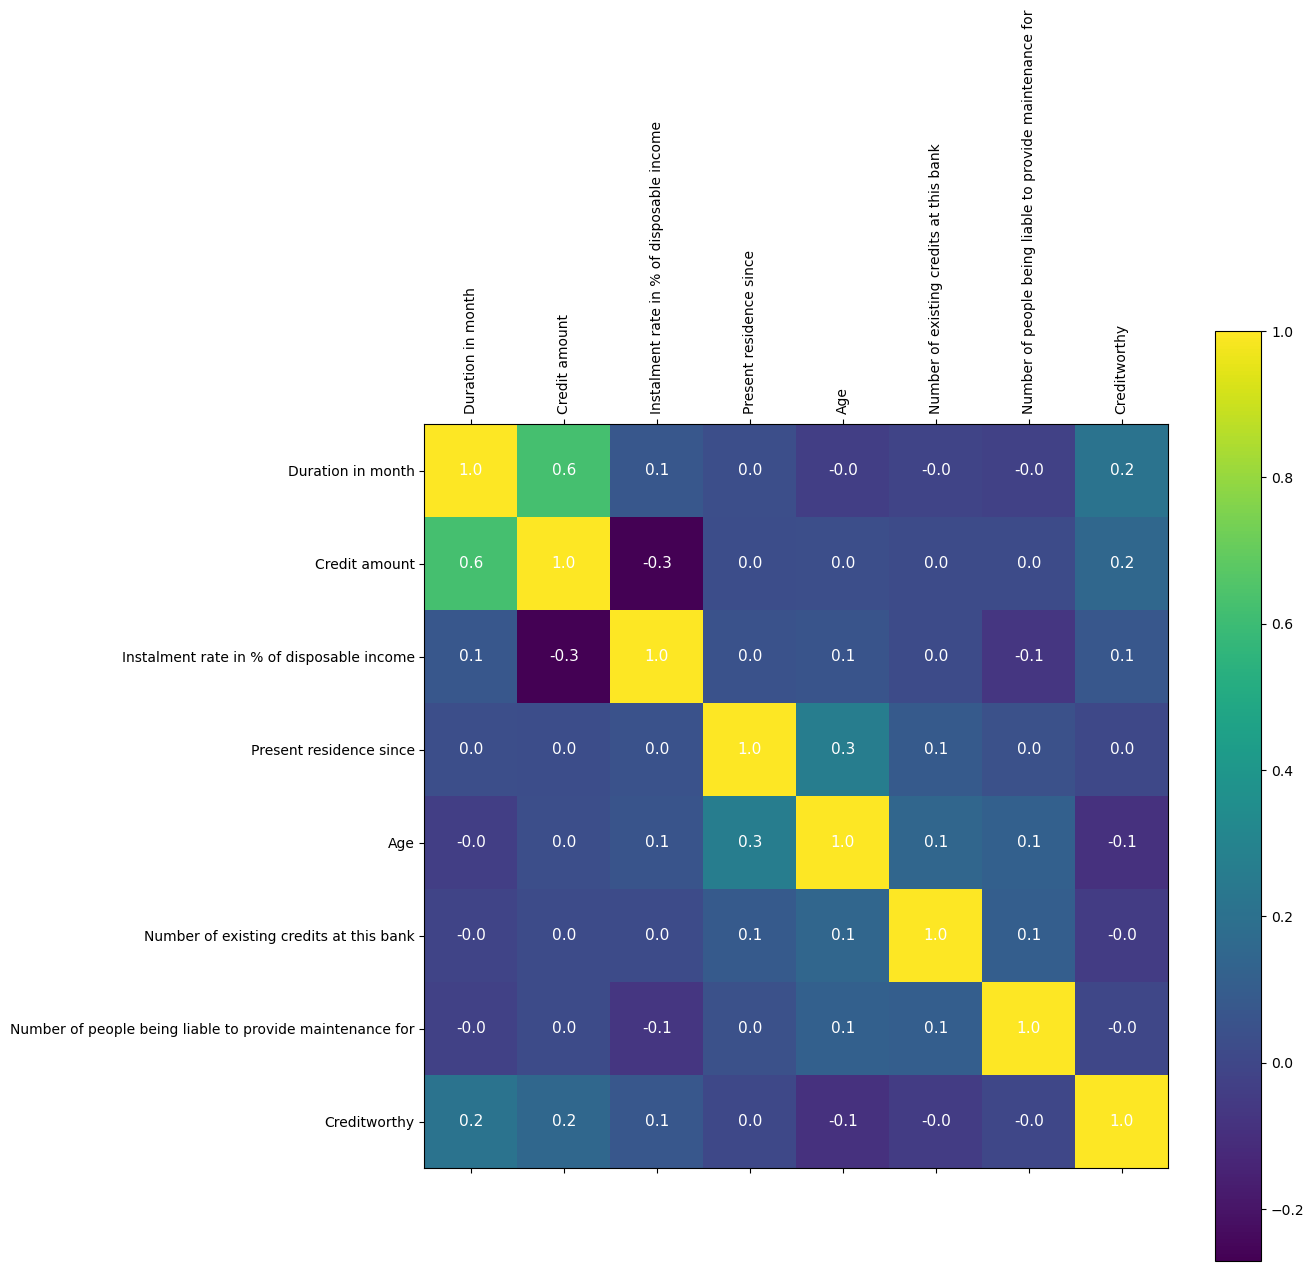

In [272]:
plt.matshow(data.corr())
plt.colorbar()
plt.xticks(np.arange(len(data.corr().columns)), data.corr().columns.values, rotation = 90) 
plt.yticks(np.arange(len(data.corr().columns)), data.corr().columns.values) 
for (i, j), corr in np.ndenumerate(data.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=11)

In [273]:
y = data['Creditworthy']
X = data.drop(['Creditworthy'], axis = 1)
X = pd.get_dummies(X)
print("Total features: {}".format(X.shape[1]))

Total features: 57


In [275]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [276]:
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [277]:
classifiers = [GaussianNB(), 
               SVC(kernel = 'rbf', probability = True), 
               DecisionTreeClassifier(random_state = 0), 
               RandomForestClassifier(n_estimators = 100, random_state = 0), 
               GradientBoostingClassifier(random_state = 0)]
classifier_names = ["Gaussian Naive Bayes", 
                    "Support Vector Classifier", 
                    "Decision Tree Classifier", 
                    "Random Forest Classifier", 
                    "Gradient Boosting Classifier"]
accuracies = []

In [278]:
for i in range(len(classifiers)):
    classifier = classifiers[i]
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print("{}:".format(classifier_names[i]))
    print("F1 score: {:.2f}".format(f1_score(y_test, y_pred)))
    accuracy = accuracy_score(y_test, y_pred)*100
    accuracies.append(accuracy)

Gaussian Naive Bayes:
F1 score: 0.80
Support Vector Classifier:
F1 score: 0.83
Decision Tree Classifier:
F1 score: 0.79
Random Forest Classifier:
F1 score: 0.85
Gradient Boosting Classifier:
F1 score: 0.85


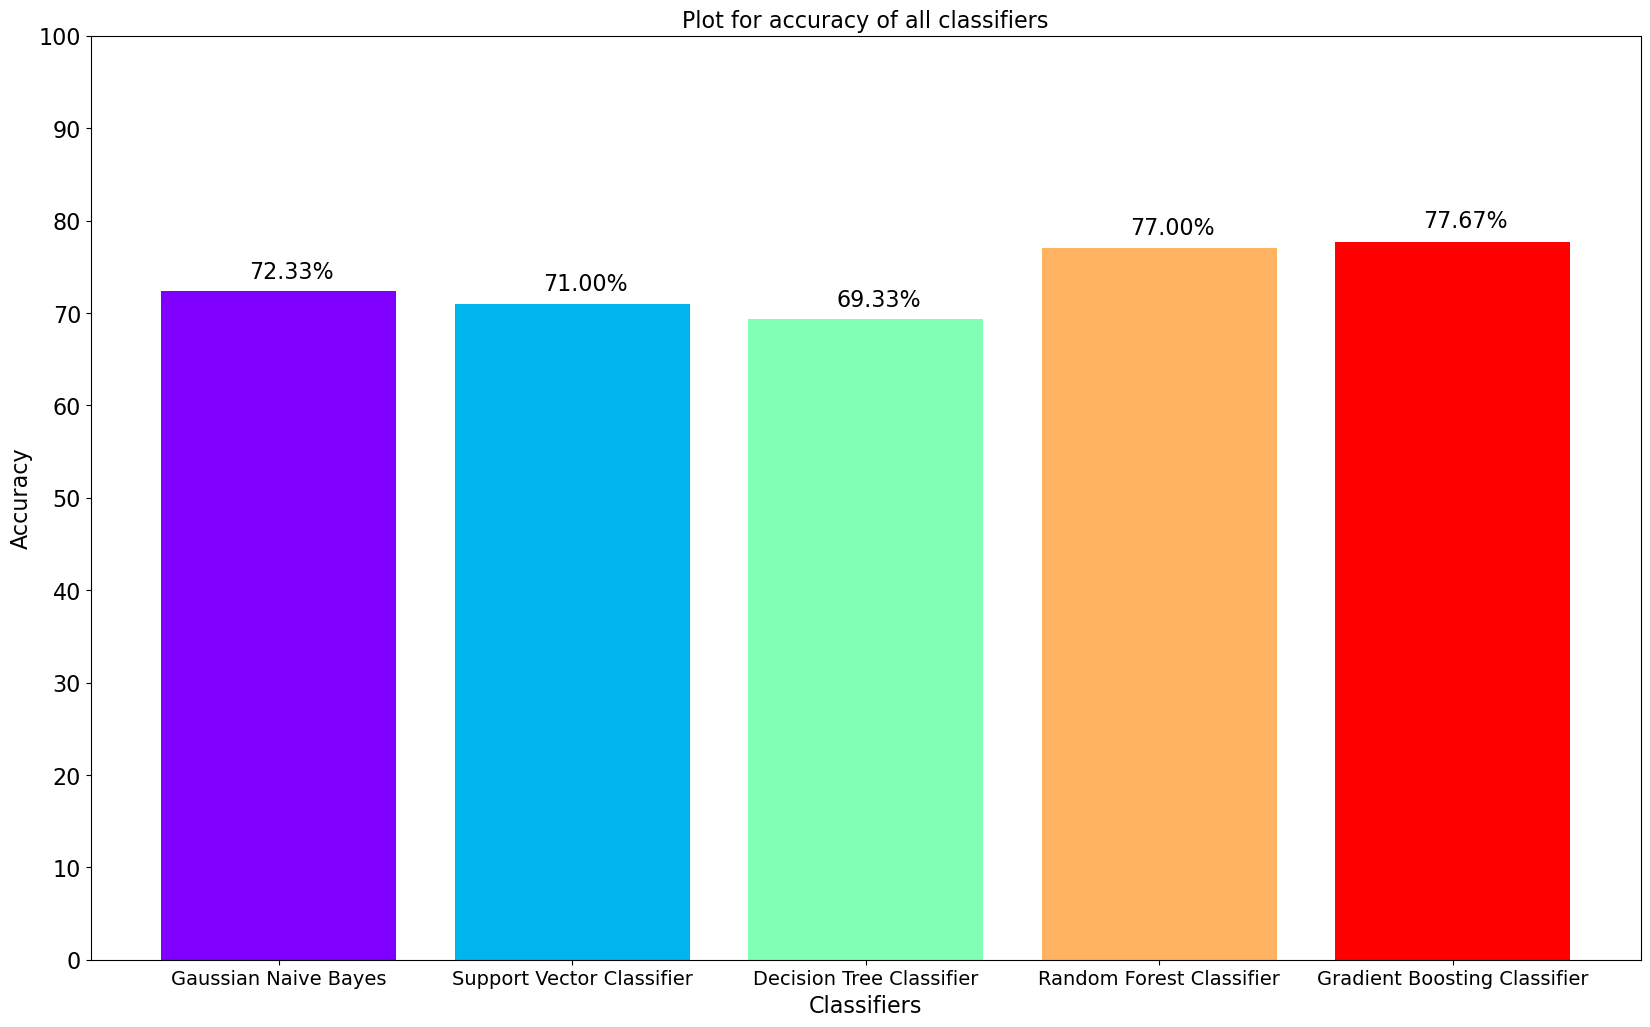

In [279]:
from matplotlib.cm import rainbow

plt.figure(figsize = (20, 12))
colors = rainbow(np.linspace(0, 1, len(classifiers)))
barplot = plt.bar(classifier_names, accuracies, color = colors)
plt.yticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100], fontsize = 16)
plt.xticks(fontsize = 14)
plt.xlabel("Classifiers", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.title("Plot for accuracy of all classifiers", fontsize = 16)
for i, bar in enumerate(barplot):
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, 
             bar.get_height()*1.02, 
             s = '{:.2f}%'.format(accuracies[i]), 
             fontsize = 16)